# Portfolio Management:



This program will show you how to compute portfolio simple returns, get daily returns and volatility.

In [7]:
# Import the libraries
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
# Get the stock symbols for the portfolio FAANG
stockSymbols = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]

In [9]:
# Get the stock starting data
stockStartDate = '2013-01-01'

In [10]:
# Get todays date and format it in the form YYY-mm-dd
today = datetime.today().strftime('%Y-%m-%d')
print(today)

2021-03-27


In [11]:
# Get the number of assets in the portfolio
numAssets = len(stockSymbols)
print('You have ' +str(numAssets)+ ' assets in your portfolio')

You have 5 assets in your portfolio


In [12]:
# Create a function to get the stock prices in the portfolio
def getMyPortfolio(stocks = stockSymbols, start = stockStartDate, end = today, col = 'Adj Close' ):
    data = web.DataReader(stocks, data_source = 'yahoo', start = start, end = end)[col]
    return data

In [15]:
# Get the stock portfolio Adj. Close price
my_stocks = getMyPortfolio(stockSymbols)
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,17.039789,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.824715,13.798571,360.483826
2013-01-04,28.760000,259.149994,16.356062,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.259851,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.303608,13.880000,365.280823
...,...,...,...,...,...
2021-03-22,293.540009,3110.870117,123.389999,523.109985,2038.589966
2021-03-23,290.630005,3137.500000,122.540001,535.090027,2052.959961
2021-03-24,282.140015,3087.070068,120.089996,520.809998,2045.060059


In [18]:
# Create a function to visualize the portfolio
def showGraph(stocks = stockSymbols, start = stockStartDate, end = today, col = 'Adj Close' ):
    
    # Create a title for the portfolio
    title = 'Portfolio ' +col+ ' Price History'
    
    # Get the stock
    my_stocks = getMyPortfolio(stocks = stocks, start = start, end = end, col = col)
    
    # Give the figure size
    plt.figure(figsize = (12.2, 4.5))
    
    # Loop through each stock and plot the peice
    for c in my_stocks.columns.values:
        plt.plot(my_stocks[c], label = c)
    plt.title(title)
    plt.xlabel('Date', fontsize = 18)
    plt.ylabel(col+ 'Price USD ($)', fontsize = 18)
    plt.legend(my_stocks.columns.values, loc = 'upper left')
    plt.show()

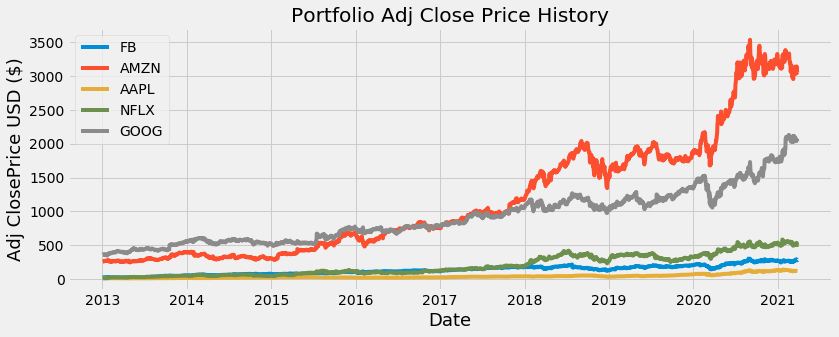

In [19]:
# Show the adjusted close price for FAANG
showGraph(stockSymbols)

In [20]:
# Calculate the simple returns
daily_simple_returns = my_stocks.pct_change(1)

# Show the daily simple returns
daily_simple_returns

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2021-03-22,0.011823,0.011678,0.028336,0.021340,-0.002256
2021-03-23,-0.009913,0.008560,-0.006889,0.022902,0.007049
2021-03-24,-0.029212,-0.016073,-0.019994,-0.026687,-0.003848


In [22]:
# Show the stock correlation
daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.525607,0.461424,0.362976,0.570232
AMZN,0.525607,1.000000,0.460656,0.456697,0.604039
AAPL,0.461424,0.460656,1.000000,0.274883,0.523444
NFLX,0.362976,0.456697,0.274883,1.000000,0.418300
GOOG,0.570232,0.604039,0.523444,0.418300,1.000000


In [23]:
# Show the covariance matrix for simple returns
daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000470,0.000220,0.000181,0.000228,0.000202
AMZN,0.000220,0.000371,0.000161,0.000255,0.000190
AAPL,0.000181,0.000161,0.000328,0.000144,0.000155
NFLX,0.000228,0.000255,0.000144,0.000840,0.000198
GOOG,0.000202,0.000190,0.000155,0.000198,0.000266


In [24]:
# Show the variance
daily_simple_returns.var()

Symbols
FB      0.000470
AMZN    0.000371
AAPL    0.000328
NFLX    0.000840
GOOG    0.000266
dtype: float64

In [25]:
# Print the standard deviation for daily simple returns
print("The Stock Volatility:")
daily_simple_returns.std()

The Stock Volatility:


Symbols
FB      0.021688
AMZN    0.019267
AAPL    0.018108
NFLX    0.028985
GOOG    0.016300
dtype: float64

Netflix is the most volatile stock by 0.28985 and the least volatile stock is Google by 0.016300. The higher the volatility, the higher the returs.

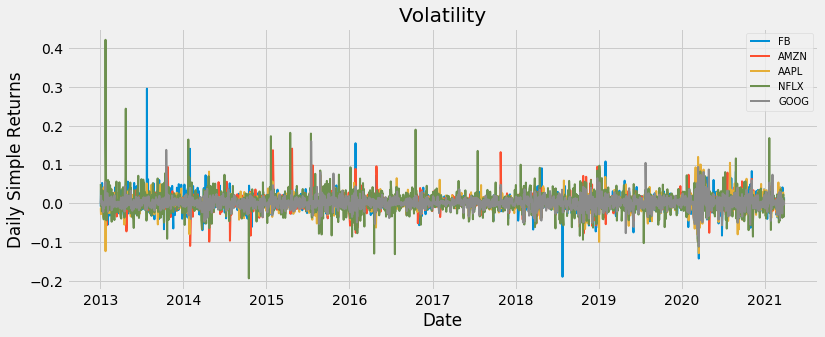

In [27]:
# Visualize the stocks daily simple returns
plt.figure(figsize =(12, 4.5))

# loop through each stock and plot the simple returns
for c in daily_simple_returns.columns.values:
    plt.plot(daily_simple_returns.index, daily_simple_returns[c], lw = 2, label = c)

# Create a legend
plt.legend(loc = 'upper right', fontsize = 10)
plt.title('Volatility')
plt.ylabel('Daily Simple Returns')
plt.xlabel('Date')
plt.show()

In [28]:
# Show the mean of the daily simple return
dailyMeanSimpleReturns = daily_simple_returns.mean()

print("The daily mean simple returns: ")
print(dailyMeanSimpleReturns)

The daily mean simple returns: 
Symbols
FB      0.001349
AMZN    0.001379
AAPL    0.001112
NFLX    0.002171
GOOG    0.000968
dtype: float64


In [29]:
# Calculate the expected portfolio daily return
randomWeights = np.array([0.4, 0.1, 0.3, 0.1, 0.1]) # 40% to FB, 10% to AMZN, 30% to aapl, 10% to NFLX, 10% GOOG

portfolioSimpleReturn = np.sum(dailyMeanSimpleReturns * randomWeights)

# Print the expected portfolio return
print("The daily expected portfolio return: " + str(portfolioSimpleReturn))

The daily expected portfolio return: 0.0013250101031644888


In [30]:
# Get the yearly simple return
print("Expected annualised portfolio simple return: " + str(portfolioSimpleReturn * 253))

Expected annualised portfolio simple return: 0.33522755610061566


In [31]:
# Calculate the growth of the investment
dailyCumulSimplReturn = (daily_simple_returns + 1).cumprod()

In [33]:
# Show the cumulative simple returns
dailyCumulSimplReturn

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.991786,1.004547,0.987378,1.049777,1.000581
2013-01-04,1.027143,1.007151,0.959875,1.043147,1.020353
2013-01-07,1.050714,1.043333,0.954228,1.078144,1.015900
2013-01-08,1.037857,1.035249,0.956796,1.055972,1.013896
...,...,...,...,...,...
2021-03-22,10.483572,12.089970,7.241287,39.797520,5.658434
2021-03-23,10.379643,12.193463,7.191404,40.708945,5.698320
2021-03-24,10.076429,11.997474,7.047622,39.622540,5.676393


In [35]:
# (period_1 + 1) * (period_2 + 1) * ... * (period_n + 1)
(daily_simple_returns["GOOG"][1] + 1) * (daily_simple_returns["GOOG"][2] + 1)

1.0203525854692204

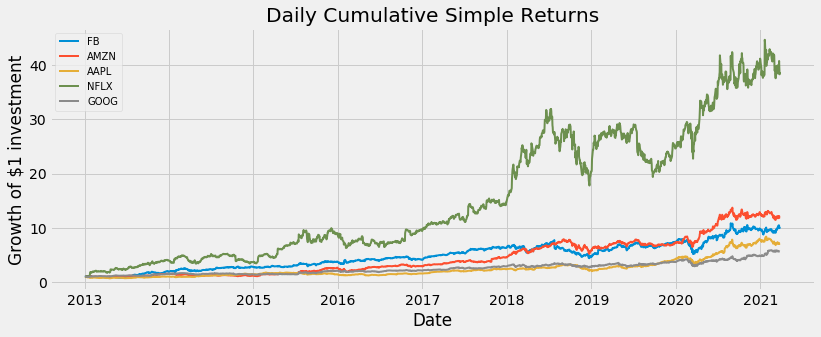

In [37]:
# Visualize the daily cumulative simple returns
plt.figure(figsize = (12.2, 4.5))
for c in dailyCumulSimplReturn.columns.values:
    plt.plot(dailyCumulSimplReturn.index, dailyCumulSimplReturn[c], lw = 2, label = c)

plt.legend(loc = 'upper left', fontsize = 10)
plt.xlabel('Date')
plt.ylabel('Growth of $1 investment')
plt.title('Daily Cumulative Simple Returns')
plt.show()